In [9]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import random
import pickle



In [2]:
#importing the dataset from sklearn datasets
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]



In [3]:
#Visualizing the data
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Visualizing the target
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int8

Index:  22466
Actual value : 1


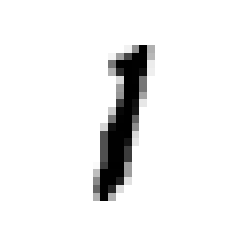

In [5]:
#How actually the data works
index = random.randint(0,60000)
sd=X.iloc[index]
dd=np.asarray(sd).reshape(28,28)
print('Index: ', index)
print('Actual value :', y[index])
plt.imshow(dd,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
#Model Training 
#Using the Random Forest Classifier
classifi= RandomForestClassifier()

#Fiting model with sample data
classifi.fit(np.array(x_train).reshape(x_train.shape[0], 28*28), y_train)



RandomForestClassifier()

In [15]:
#Model testing aand finding accuracy
score=classifi.score(x_test, y_test)
print('Random Tree Classifier:\n' )

print('Score\t'+str(score))
print('Accuracy:',(score*100))

Random Tree Classifier:

Score	0.9704
Accuracy: 97.04


In [16]:
#Dumping the model
pickle.dump(classifi,open('model.pkl','wb'))